In [32]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array=cv2.imread("Test_dataset/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

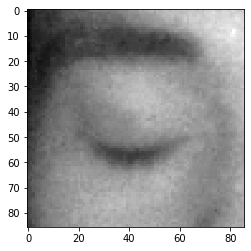

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 86)

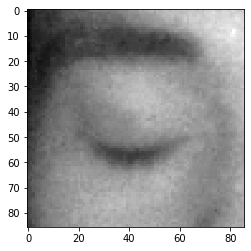

In [5]:
Datadirectory="Test_dataset/"
Classes=["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

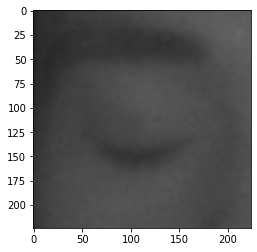

In [6]:
img_size=224
new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

# Read all the images and convert them into an array for data and labels

In [7]:
training_Data=[]
def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array=cv2.resize(backtorgb,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
print(len(training_Data))

1931


In [10]:
import random
random.shuffle(training_Data)

In [11]:
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)


In [12]:
X.shape

(1931, 224, 224, 3)

In [13]:
#normalize the data
X=X/255.0

In [14]:
Y=np.array(y)

In [44]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [15]:
#deep learning model for training- transfer learning

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
model=tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

# Transfer Learning

In [19]:
base_input=model.layers[0].input

In [20]:
base_output=model.layers[-4].output

In [21]:
Flat_layer=layers.Flatten()(base_output)
final_output=layers.Dense(1)(Flat_layer)
final_output=layers.Activation('sigmoid')(final_output)

In [22]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# Settings for binary classification

In [24]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [27]:
new_model.fit(X,Y,epochs=10,validation_split=0.1) ##training



Epoch 1/10
55/55 [==============================] - 881s 14s/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 14.9325 - val_accuracy: 0.4897
Epoch 2/10
55/55 [==============================] - 682s 12s/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 18.0879 - val_accuracy: 0.4897
Epoch 3/10
55/55 [==============================] - 672s 12s/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.1063 - val_accuracy: 0.9536
Epoch 4/10
55/55 [==============================] - 686s 12s/step - loss: 0.0226 - accuracy: 0.9937 - val_loss: 0.2342 - val_accuracy: 0.9639
Epoch 5/10
55/55 [==============================] - 630s 11s/step - loss: 0.0277 - accuracy: 0.9937 - val_loss: 0.1037 - val_accuracy: 0.9742
Epoch 6/10
55/55 [==============================] - 664s 12s/step - loss: 0.0023 - accuracy: 0.9988 - val_loss: 0.0472 - val_accuracy: 0.9845
Epoch 7/10
55/55 [==============================] - 1971s 36s/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0401 - val_accuracy: 0.9845
Epo

In [28]:
new_model.save('my_model.h5')

# checking the network for prediction

In [34]:
new_model=tf.keras.models.load_model('my_model.h5')
img_size=224
img_array=cv2.imread('s0005_00561_0_0_0_0_1_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array=cv2.resize(backtorgb,(img_size,img_size))

In [35]:
X_input=np.array(new_array).reshape(1,img_size,img_size,3)

In [36]:
X_input.shape

(1, 224, 224, 3)

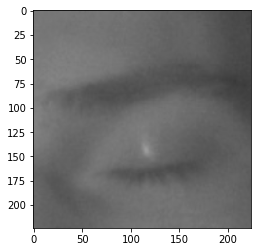

In [37]:
plt.imshow(new_array)

In [38]:
X_input=X_input/255.0

In [39]:
prediction= new_model.predict(X_input)

In [40]:
if(prediction<0.5):
    print('closed eye')

closed eye


In [76]:
# lets check for Unknown image

img =cv2.imread('eyesclosed.jpg')

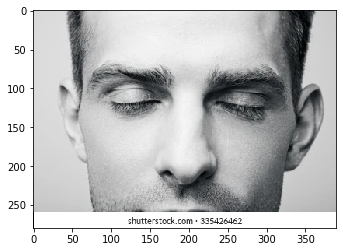

In [77]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [78]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [79]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')

In [80]:

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [81]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)

In [82]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

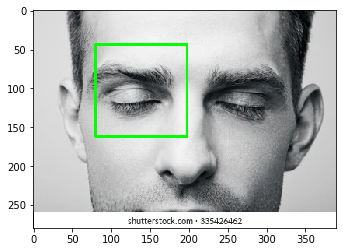

In [83]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [84]:
#cropping the eye image

eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

eyes=eye_cascade.detectMultiScale(gray,1.1,4)

for x,y,w,h in eyes:
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("Eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi=roi_color[ey: ey+eh,ex: ex+ew]

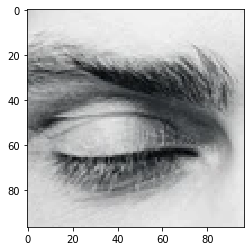

In [85]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [86]:
eyes_roi.shape

(97, 97, 3)

In [87]:
final_image=cv2.resize(eyes_roi,(224,224))
final_image=np.expand_dims(final_image,axis=0)
final_image=final_image/255.0

In [88]:
final_image.shape

(1, 224, 224, 3)

In [89]:
prediction=new_model.predict(final_image)

In [90]:
if(prediction>0.5):
    print('open eye')
else:
    print('closed eye')
    
print(prediction)

closed eye
[[2.9207807e-09]]


# Realtime Video Demo

In [95]:
path="haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(1)

#to check if webcam is correctly opened
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey: ey+eh,ex:ex + ew]
                
    font=cv2.FONT_HERSHEY_SIMPLEX
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    Predictions=new_model.predict(final_image)
    if(Predictions>0.5):
        status="Open eyes"
    else:
        status="Closed eyes"
    
    print(Predictions)
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    #Use putText  method to insert text in video
    
    cv2.putText(frame,
                status,
                (50,50),
                font,3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.imshow('Drowsiness detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

[[0.00381157]]
False
Eyes are not detected
Eyes are not detected
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
Eyes are not detected
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.00381157]]
False
[[0.003811

KeyboardInterrupt: 

In [97]:
import winsound
frequency=2500
duration=1000


path="haarcascade_frontalface_default.xml"
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(1)

#to check if webcam is correctly opened
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
counter=0   
while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("Eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey: ey+eh,ex:ex + ew]
                
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
    font=cv2.FONT_HERSHEY_SIMPLEX
    
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)
    final_image=final_image/255.0
    
    Predictions=new_model.predict(final_image)
    print(Predictions)
    if(Predictions>0.5):
        status="Open eyes"
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0,255,0),
                2,
                cv2.LINE_4)
        x1,y1,w1,h1=0,0,175,75
        
        cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        
        cv2.putText(frame,'Active',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
        
        
    else:
        counter=counter+1
        status="Closed eyes"
        cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0,255,0),
                2,
                cv2.LINE_4)
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        
        if counter>5:
            x1,y1,w1,h1=0,0,175,75

            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
            cv2.putText(frame,'Sleep alert',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)
    #print(Predictions)
            winsound.Beep(frequency,duration)
            counter=0
    
    
    
    cv2.imshow('Drowsiness detection',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

False
[[0.99988794]]
False
[[0.99988794]]
False
[[0.99988794]]
False
[[0.99988794]]
False
[[0.99988794]]
False
[[0.99988794]]
False
[[0.99988794]]
False
[[0.99988794]]
Eyes are not detected
Eyes are not detected
False
[[0.9999724]]
Eyes are not detected
False
[[0.9999724]]
False
[[0.9999724]]
False
[[0.9999874]]
False
[[0.9988476]]
False
[[0.99625206]]
Eyes are not detected
False
[[0.00670004]]
False
[[0.98602796]]
False
[[0.9830885]]
False
[[0.99991256]]
False
[[0.9999803]]
False
[[0.9999368]]
False
[[0.99998665]]
False
[[0.9997513]]
Eyes are not detected
False
[[0.9997513]]
Eyes are not detected
False
[[0.9997513]]
False
[[0.9997513]]
False
[[0.9997513]]
Eyes are not detected
False
[[0.9997513]]
False
[[0.9997513]]
Eyes are not detected
False
[[0.9997513]]
False
[[0.9997513]]
False
[[0.9997513]]
False
[[9.779833e-05]]
Eyes are not detected
False
[[9.779833e-05]]
False
[[0.00192228]]
False
[[0.02515134]]
False
[[0.57586896]]
False
[[5.186395e-06]]
False
[[0.00084767]]
False
[[0.002931

False
[[0.9997196]]
False
[[0.04896095]]
False
[[4.108001e-05]]
False
[[0.9152446]]
False
[[0.03246212]]
False
[[0.989607]]
False
[[0.9988503]]
Eyes are not detected
False
[[0.9988503]]
Eyes are not detected
False
[[0.9999748]]
False
[[0.48815975]]
Eyes are not detected
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
Eyes are not detected
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
False
[[0.48815975]]
Eyes are not detected
False
[[0.9999995]]
Eyes are not detected
False
[[0.99999964]]
False
[[0.99999917]]
Eyes are not detected
False
[[0.99999917]]
False
[[0.99936366]]
False
[[0.18478781]]
False
[[0.9999964]]
False
[[1.]]
Eyes are not detected
False
[[1.]]
False
[[0.99999976]]
False
[[0.9999997]]
Eyes are not detected
False
[[0.99309903]]
False
[[0.9999995]]
False
[[0.9999728]]
False
[[0.5369263]]
False
[[1.]]
Eyes are not detec

False
[[0.9999994]]
Eyes are not detected
False
[[0.9999994]]
Eyes are not detected
False
[[0.9999994]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[6.078488e-08]]
False
[[0.9999994]]
False
[[0.00223112]]
False
[[0.00223112]]
False
[[0.6341352]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.9807266]]
False
[[0.99965084]]
False
[[0.99965084]]

KeyboardInterrupt: 